In [108]:

import pandas as pd

from datetime import date
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [32]:
sns.set(rc={'figure.figsize':(10, 6)})

In [33]:
# read data from file
data = pd.read_excel("data//data.xlsx")
data.head()

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,open quantity,Delivery deviation in days,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Unnamed: 34,Unnamed: 35
0,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,1,...,3,NaN,NaN,3,under-delivery,6720.0,EUR,1,NaN,NaN
1,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,2,...,3,NaN,NaN,3,under-delivery,18162.0,EUR,1,NaN,NaN
2,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,3,...,3,NaN,NaN,3,under-delivery,5710.0,EUR,1,NaN,NaN
3,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,4,...,3,NaN,NaN,3,under-delivery,29890.0,EUR,1,NaN,NaN
4,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,5,...,3,NaN,NaN,3,under-delivery,9646.0,EUR,1,NaN,NaN


# Datenanpassungen

In [34]:
#dropping some columns since unnecessaary 
data.drop("Unnamed: 34", inplace=True, axis = 1) 
data.drop("Unnamed: 35", inplace=True, axis = 1) 
data.drop("Delivery deviation  in days", inplace=True, axis = 1)

In [35]:
data["Delivery deviation in days"] = data["delivery date"] - data["supplier delivery date"]

In [36]:
data["Delivery deviation in days"] = data["Delivery deviation in days"].apply(lambda x: float(x.days))

In [37]:
conditions = [(data['Delivery deviation in days'] <= 0),
              (data['Delivery deviation in days'] >= 1) & (data['Delivery deviation in days'] <= 4),
              (data['Delivery deviation in days'] >= 5) & (data['Delivery deviation in days'] <= 10),
              (data['Delivery deviation in days'] > 10)]

In [38]:
values = ['in time', 'late: < 5 days', 'late: 5 to 10 days', 'late: > 10 days']

In [39]:
data['deviation indicator'] = np.select(conditions, values)

In [11]:
data.head()

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,ORDERED Quantity,Delivered QTY,open quantity,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Delivery deviation in days
0,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,1,...,10.0,7.0,3,in time,3,under-delivery,6720.0,EUR,1,0.0
1,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,2,...,10.0,7.0,3,in time,3,under-delivery,18162.0,EUR,1,0.0
2,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,3,...,10.0,7.0,3,in time,3,under-delivery,5710.0,EUR,1,0.0
3,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,4,...,10.0,7.0,3,in time,3,under-delivery,29890.0,EUR,1,0.0
4,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,5,...,13.0,10.0,3,in time,3,under-delivery,9646.0,EUR,1,0.0


In [40]:
data['Year'] = data['Document Date'].dt.year
data['Month'] = data['Document Date'].dt.month
data['Year/Month'] = data['Document Date'].dt.year.astype(str)+'/'+data['Document Date'].dt.month.astype(str)

In [25]:
data

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,ORDERED Quantity,Delivered QTY,open quantity,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Delivery deviation in days
0,2019-02-28,2019/2,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,1,...,10.0,7.0,3,in time,3,under-delivery,6720.00,EUR,1,0.0
1,2019-02-28,2019/2,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,2,...,10.0,7.0,3,in time,3,under-delivery,18162.00,EUR,1,0.0
2,2019-02-28,2019/2,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,3,...,10.0,7.0,3,in time,3,under-delivery,5710.00,EUR,1,0.0
3,2019-02-28,2019/2,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,4,...,10.0,7.0,3,in time,3,under-delivery,29890.00,EUR,1,0.0
4,2019-02-28,2019/2,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,5,...,13.0,10.0,3,in time,3,under-delivery,9646.00,EUR,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12131,2020-04-04,2020/4,2020,4,2020-04-11,2020-04-11,53,GB,8208031999,4,...,2.0,2.0,0,in time,0,no deviation,80.86,EUR,1,0.0
12132,2020-04-04,2020/4,2020,4,2020-04-11,2020-04-11,53,GB,8208031999,5,...,2.0,2.0,0,in time,0,no deviation,96.82,EUR,1,0.0
12133,2020-04-17,2020/4,2020,4,2020-04-24,2020-04-24,53,GB,8208040617,1,...,30.0,30.0,0,in time,0,no deviation,11175.00,EUR,1,0.0
12134,2020-04-17,2020/4,2020,4,2020-04-24,2020-04-24,53,GB,8208040618,1,...,30.0,30.0,0,in time,0,no deviation,11175.00,EUR,1,0.0


In [28]:
data.columns

Index(['Document Date', 'Year/Month', 'Year', 'Month',
       'supplier delivery date', 'delivery date', 'Company Code', 'Country',
       'Purchasing Doc.', 'Item', 'Purchasing Org.', 'Plant', 'Supplier',
       'Supplier name', 'Postal code', 'Street', 'City', 'Supplier\ncountry',
       'Material', 'Material Short Text', 'Material Group',
       'Material Group Text', 'Order Unit', 'Net price', 'ORDERED Quantity',
       'Delivered QTY', 'open quantity', 'deviation indicator',
       'deviation cause', 'deviation cause text', 'Net Value',
       'Local Currency', 'Counter', 'Delivery deviation in days'],
      dtype='object')

In [13]:
data.to_csv("data_01.csv")

# Seite 1: Lieferantenperformance (Visualisierung)

Gesamtsumme Ordered Spend & Anzahl Bestellungen (aktuel vs vorjahr)

In [150]:
orderedSpend_year = data.groupby(["Year"])[["Net Value"]].sum().reset_index()

data_2019 = data[data["Year"] == 2019]
data_2020 = data[data["Year"] == 2020]

numbOrders_2019 = len(data_2019["ORDERED Quantity"])

numbOrders_2020 = len(data_2020["ORDERED Quantity"])

orderedSpend_year

,Year,Net Value
0,2019,7.658801e+07
1,2020,2.318936e+07


In [151]:
numbOrders_2019

7939

In [152]:
numbOrders_2020

4197

Ordered Spend & Anzahl Bestellungen im aktuellen Jahr (YTD) nach Monaten
im Vergleich zum Vorjahr:

In [55]:
orderdSpend_month_2019 = data_2019.groupby(["Month"])[["Net Value"]].sum().reset_index()
orderdSpend_month_2020 = data_2020.groupby(["Month"])[["Net Value"]].sum().reset_index()

In [59]:
# orderdSpend_month_2020

In [56]:
numbOrders_month_2019 = data_2019.groupby(["Month"])[["ORDERED Quantity"]].count().reset_index()
numbOrders_month_2020 = data_2020.groupby(["Month"])[["ORDERED Quantity"]].count().reset_index()


In [57]:
numbOrders_month_2020["ORDERED Quantity"].sum() # nur zum testen ob die zahl stimmt

4197

In [62]:
orderdSpend_month_2019

,Month,Net Value
0,1,7.534322e+05
1,2,3.807863e+07
2,3,8.752134e+05
3,4,1.602919e+06
4,5,2.071517e+06
5,6,1.183767e+06
6,7,3.008581e+06
7,8,3.556269e+06
8,9,7.671278e+06
9,10,5.528378e+06


In [153]:
numbOrders_month_2020

,Month,ORDERED Quantity
0,1,1069
1,2,1041
2,3,891
3,4,694
4,5,218
5,6,284


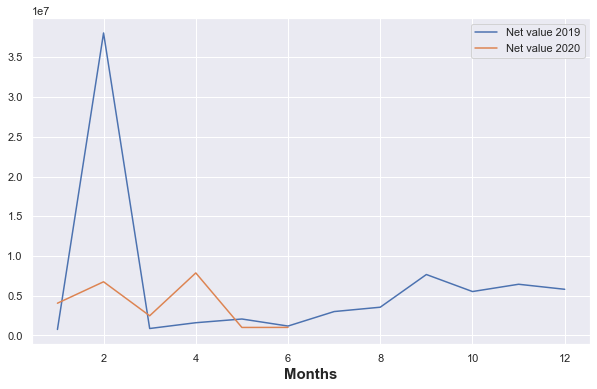

In [66]:
#  data
x1 = orderdSpend_month_2019["Month"]
y1 = orderdSpend_month_2019["Net Value"]

x2 = orderdSpend_month_2020["Month"]
y2 = orderdSpend_month_2020["Net Value"]

# plot lines
plt.plot(x1, y1, label = "Net value 2019" )
plt.plot(x2, y2, label = "Net value 2020")
plt.xlabel('Months', fontweight ='bold', fontsize = 15)

plt.legend()
plt.show()

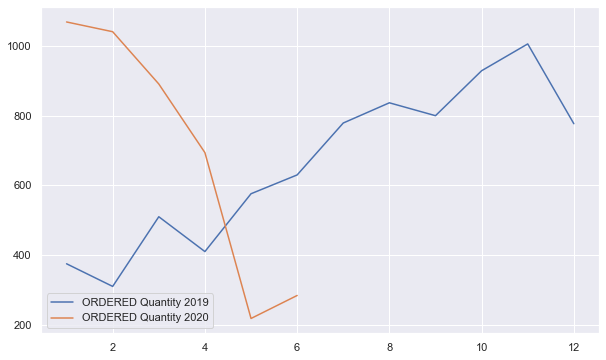

In [65]:
x3 = numbOrders_month_2019["Month"]
y3 = numbOrders_month_2019["ORDERED Quantity"]

x4 = numbOrders_month_2020["Month"]
y4 = numbOrders_month_2020["ORDERED Quantity"]

plt.plot(x3, y3, label = "ORDERED Quantity 2019" )
plt.plot(x4, y4, label = "ORDERED Quantity 2020")
plt.legend()
plt.show()

Ordered Spend & Anzahl Bestellungen im aktuellen Jahr (YTD) nach
Einkaufsorganisation im Vergleich zum Vorjahr

In [71]:
orderdSpend_numbOrders2019 = data_2019.groupby('Purchasing Org.').agg({'Net Value':'sum', 'ORDERED Quantity': 'count'}).reset_index()
orderdSpend_numbOrders2020 = data_2020.groupby('Purchasing Org.').agg({'Net Value':'sum', 'ORDERED Quantity': 'count'}).reset_index()

In [122]:
# zum string umwandeln damit plotly die zahlen nicht als zahl sondern als eine Bezeichnung für Organistan erkennt
orderdSpend_numbOrders2020["Purchasing Org."] = orderdSpend_numbOrders2020["Purchasing Org."].apply(lambda x: str(x))
orderdSpend_numbOrders2019["Purchasing Org."] = orderdSpend_numbOrders2019["Purchasing Org."].apply(lambda x: str(x))

In [155]:
orderdSpend_numbOrders2019

,Purchasing Org.,Net Value,ORDERED Quantity
0,54,9.277660e+05,224
1,5200,3.150065e+06,456
2,5210,1.645176e+05,20
3,5310,1.348624e+04,32
4,5320,1.990796e+04,54
5,5400,5.959146e+07,5129
6,5410,1.272081e+07,2024


In [154]:

# set height of bar
orderdSpend_2019 = orderdSpend_numbOrders2019["Net Value"]
orderdSpend_2020 = orderdSpend_numbOrders2020["Net Value"]

fig = go.Figure(data=[
    go.Bar(name='Order spend 2019', x=orderdSpend_numbOrders2019["Purchasing Org."], y= orderdSpend_2019),
    go.Bar(name='Order spend 2020', x=orderdSpend_numbOrders2020["Purchasing Org."], y=orderdSpend_2020)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [156]:

# set height of bar
numbOrders_2019 = orderdSpend_numbOrders2019["Purchasing Org."]
numbOrders_2020 = orderdSpend_numbOrders2020["Purchasing Org."]

fig = go.Figure(data=[
    go.Bar(name='Number of orders 2019', x=orderdSpend_numbOrders2019["Purchasing Org."], y= numbOrders_2019),
    go.Bar(name='Numbers of orders 2020', x=orderdSpend_numbOrders2020["Purchasing Org."], y=numbOrders_2020)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Top 10 Lieferanten nach Ordered Spend (aktuelles Jahr) im Vergleich zum
Vorjahr

In [23]:
supplier_netValue = data.groupby(["Year","Supplier name"])[["Net Value"]].sum().reset_index().sort_values(by = "Net Value",  ascending=False)

In [132]:
top10_2019 = data_2019.groupby(["Supplier name"])[["Net Value"]].sum().reset_index().sort_values(by = "Net Value",  ascending=False).head(10)
top10_2020 = data_2020.groupby(["Supplier name"])[["Net Value"]].sum().reset_index().sort_values(by = "Net Value",  ascending=False).head(10)

In [143]:
top10_2020

,Supplier name,Net Value
30,ETELIERS DE LE HEUTE-GERU,14487155.87
47,HUMET FESTENING SYSTEMS,2337105.18
56,LISI EERUSPECE,1558133.68
90,SEFREN CEBIN FRENCE,970236.67
29,ESPE HUTCHINSUN EERUSPECE,525644.12
105,TITGEMEYER GEBR GMBH & CU,252900.00
97,SPS TECHNULUGIES LTD,248128.20
120,WESCU EIRCREFT EMEE LTD,244852.92
55,LIEBHERR EERUSPECE TUULUU,239145.00
19,EIR BP SWEDEN EB,227200.00


In [148]:

fig = go.Figure(data=[
    go.Bar(name='Order spend 2019', x=top10_2019["Supplier name"] , y= top10_2019["Net Value"]),
#     go.Bar(name='Order spend 2020', x=top10_2020["Supplier name"] , y=top10_2020["Net Value"])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

fig = go.Figure(data=[
#     go.Bar(name='Order spend 2019', x=top10_2019["Supplier name"] , y= top10_2019["Net Value"]),
    go.Bar(name='Order spend 2020', x=top10_2020["Supplier name"] , y=top10_2020["Net Value"])
])
# Change the bar mode
# fig.update_layout(barmode='group')
fig.show()